In [50]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
import numpy as np
from scipy import misc
import cv2
from keras import backend as K


def contrastive_loss(y_true, y_pred):
    '''Contrastive loss from Hadsell-et-al.'06
    http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    '''
    margin = 1
    return K.mean(y_true * K.square(y_pred) +
                  (1 - y_true) * K.square(K.maximum(margin - y_pred, 0)))


keras.losses.contrastive_loss = contrastive_loss

siamese_network = keras.models.load_model("/Users/Jimmy/Desktop/siamese4/checkpoint.59.hdf5")

In [41]:
siamese_network.layers

In [29]:
siamese_network.layers[2].layers

In [33]:
from keras.models import Model

internal_model = siamese_network.layers[2]

Siamese score:  [[ 0.3764112]]


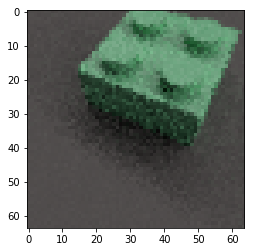

In [55]:
# Loading the test images
from matplotlib import pyplot as plt
import cv2

%matplotlib inline
path1 = "/Users/Jimmy/Desktop/training_data/legos/lego2x2/green/block-mini12.png"
path2 =  "/Users/Jimmy/Desktop/training_data/legos/lego2x2/dkred/block-mini21.png"
path3 = "/Users/Jimmy/Desktop/training_data/legos/lego2x2/green/block-mini14.png"
path4 =  "/Users/Jimmy/Desktop/training_data/legos/lego2x2/dkred/block-mini25.png"


img1 = misc.imread(path1, mode="RGB")
img2 = misc.imread(path2, mode="RGB")
img3 = misc.imread(path3, mode="RGB")
img4 = misc.imread(path4, mode="RGB")
img1 = cv2.resize(img1, (64,64))/255
img2 = cv2.resize(img2, (64,64))/255
img3 = cv2.resize(img3, (64,64))/255
img4 = cv2.resize(img4, (64,64))/255

import time
t1 = time.time()
prediction = siamese_network.predict([np.expand_dims(img1,axis=0),np.expand_dims(img3, axis=0)])
#print(time.time() - t1)
print("Siamese score: ", prediction)


plt.imshow(img1)

In [78]:
import os
import sys
import time
import random
from tqdm import tqdm

def img_paths(directory):
    return [os.path.join(root, f) for root, _, files in os.walk(directory)
            for f in files if f != "target.png" and f != ".DS_Store"]

def cl(path):
    return "#".join(path.split("/")[-3:-1])

paths = img_paths("/Users/Jimmy/Desktop/training_data/legos/")
random.shuffle(paths)
threshold = 0.5
shape_correct = 0
correct = 0
color_correct = 0
wrong = 0
num_examples = 3000
counter = 0
for i, path1 in tqdm(enumerate(paths)):
    if counter > num_examples:
            break
    for j, path2 in enumerate(paths):
        if counter > num_examples:
            break
        counter += 1
        img1 = misc.imread(path1, mode="RGB")
        img2 = misc.imread(path2, mode="RGB")
        img1 = cv2.resize(img1, (64,64))/255
        img2 = cv2.resize(img2, (64,64))/255
        cl1 = cl(path1)
        cl2 = cl(path2)
        
        shape1, color1 = cl1.split("#")
        shape2, color2 = cl2.split("#")
        
        score = siamese_network.predict([np.expand_dims(img1, axis=0), np.expand_dims(img2, axis=0)])
        
        correct += 1 if cl1 == cl2 and threshold > score or cl1 != cl2 and threshold < score else 0
        shape_correct += 1 if shape1 == shape2 and threshold > score or shape1 != shape2 and threshold < score else 0
        color_correct += 1 if color1 == color2 and threshold > score or color1 != color2 and threshold < score else 0


0it [00:00, ?it/s]
1it [00:26, 26.91s/it]

In [80]:
correct/3000.

0.8866666666666667

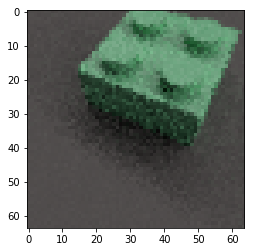

In [91]:
def show(path="/Users/Jimmy/Desktop/training_data/legos/lego2x2/green/block-mini12.png"):
    img = misc.imread(path, mode="RGB")
    plt.imshow(img)

show()

In [86]:
# Find the most similar to the green block

target = misc.imread("/Users/Jimmy/Desktop/training_data/legos/lego2x2/green/block-mini12.png", mode="RGB")
target = cv2.resize(target, (64,64))/255
scores = []
for j, path in tqdm(enumerate(paths)):
    counter += 1
    img = misc.imread(path, mode="RGB")
    img = cv2.resize(img, (64,64))/255
    score = siamese_network.predict([np.expand_dims(target, axis=0), np.expand_dims(img, axis=0)])
    scores.append((path, score))
    if j > 5000:
        break


0it [00:00, ?it/s]
9it [00:00, 78.22it/s]
17it [00:00, 75.97it/s]
28it [00:00, 81.77it/s]
39it [00:00, 87.00it/s]
50it [00:00, 92.34it/s]
61it [00:00, 96.05it/s]
72it [00:00, 98.24it/s]
83it [00:00, 99.18it/s]
94it [00:00, 100.73it/s]
105it [00:01, 100.91it/s]
4994it [00:39, 132.81it/s]

In [92]:
score = siamese_network.predict([np.expand_dims(target, axis=0), np.expand_dims(target, axis=0)])
score

array([[ 0.00031623]], dtype=float32)

In [87]:
sorted_scores = sorted(scores, key=lambda x: x[1])
sorted_scores

[('/Users/Jimmy/Desktop/training_data/legos/lego2x4/ltteal/block-mini30.png',
  array([[ 0.00684698]], dtype=float32)),
 ('/Users/Jimmy/Desktop/training_data/legos/lego_roof_2x1/ltteal/block-mini32.png',
  array([[ 0.01352341]], dtype=float32)),
 ('/Users/Jimmy/Desktop/training_data/legos/lego2x4/mdgreen/block-mini82.png',
  array([[ 0.01354233]], dtype=float32)),
 ('/Users/Jimmy/Desktop/training_data/legos/lego2x4/ltblue/block-mini86.png',
  array([[ 0.01702957]], dtype=float32)),
 ('/Users/Jimmy/Desktop/training_data/legos/lego1x1/doveblue/block-mini7.png',
  array([[ 0.01753741]], dtype=float32)),
 ('/Users/Jimmy/Desktop/training_data/legos/lego2x2/ltteal/block-mini27.png',
  array([[ 0.01789798]], dtype=float32)),
 ('/Users/Jimmy/Desktop/training_data/legos/lego2x2/ltgreen/block-mini10.png',
  array([[ 0.01973032]], dtype=float32)),
 ('/Users/Jimmy/Desktop/training_data/legos/lego2x2/ltteal/block-mini32.png',
  array([[ 0.02038643]], dtype=float32)),
 ('/Users/Jimmy/Desktop/trainin

4994it [00:51, 97.61it/s]